In [ ]:
from google.colab import files

In [ ]:
files.upload()     # <================= Veuillez importer le fichier 'treebasednetworks.py'

Saving treebasednetworks.py to treebasednetworks.py


{'treebasednetworks.py': b'# -*- coding: utf-8 -*-\n"""TreeBasedNetworks.ipynb\n\nAutomatically generated by Colaboratory.\n\nOriginal file is located at\n    https://colab.research.google.com/drive/1nmhj-_a2ZugMWGUKZceOhr5CgsDk8gwz\n"""\n\nimport networkx as nx\nimport random\nimport matplotlib.pyplot as plt\nimport pandas as pd\nfrom functools import reduce\nfrom asymmetree.treeevolve.SpeciesTree import species_tree_n\nfrom asymmetree.tools.PhyloTreeTools import (to_newick,)\nfrom tralda.datastructures.Tree import Tree\n\nclass TransferManager:\n    def __init__(self):\n        pass\n\n    def add_transfer_to_tree(self, G, pw, w, pay, ay, c, attributes, max_node_value):\n\n        """\n            Ajoute un transfert au graphe G.\n\n            Cette fonction effectue les \xc3\xa9tapes n\xc3\xa9cessaires pour ajouter un transfert au graphe G. Elle supprime d\'abord les ar\xc3\xaates\n            entre les n\xc5\x93uds pw, w, pay et ay, puis ajoute de nouveaux n\xc5\x93uds et ar\xc3\x

In [ ]:
pip install asymmetree

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.0/91.0 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 kB 5.4 MB/s eta 0:00:00


In [ ]:
files.upload() # <================= Veuillez importer le fichier 'inter_species_tree.pkl'

Saving inter_species_tree.pkl to inter_species_tree.pkl


{'inter_species_tree.pkl': b'\x80\x04\x95m\x11\x00\x00\x00\x00\x00\x00\x8c\x18networkx.classes.digraph\x94\x8c\x07DiGraph\x94\x93\x94)\x81\x94}\x94(\x8c\x05graph\x94}\x94\x8c\x05_node\x94}\x94(\x8a\x06\x90J`h\x18\x7f}\x94\x8c\x07species\x94\x8c\x00\x94s\x8a\x06\xd0@iQ\x18\x7f}\x94h\n\x8c\x06T08201\x94s\x8a\x06\xd0\x14\xa0Q\x18\x7f}\x94h\n\x8c\x06T04453\x94s\x8a\x06PBiQ\x18\x7f}\x94h\n\x8c\x06T01461\x94s\x8a\x06\x90eiQ\x18\x7f}\x94h\nh\x0bs\x8a\x06\x90niQ\x18\x7f}\x94h\n\x8c\x06T08780\x94s\x8a\x06PoiQ\x18\x7f}\x94h\nh\x0bs\x8a\x06\x10piQ\x18\x7f}\x94h\n\x8c\x06T04021\x94s\x8a\x06\xd0piQ\x18\x7f}\x94h\n\x8c\x06T00577\x94s\x8a\x06\x90qiQ\x18\x7f}\x94h\nh\x0bs\x8a\x06\x90riQ\x18\x7f}\x94h\n\x8c\x06T06085\x94s\x8a\x06PsiQ\x18\x7f}\x94h\nh\x0bs\x8a\x06\x10tiQ\x18\x7f}\x94h\nh\x0bs\x8a\x06\xd0tiQ\x18\x7f}\x94h\n\x8c\x06T04721\x94s\x8a\x06\x90uiQ\x18\x7f}\x94h\n\x8c\x06T04481\x94s\x8a\x06\x90viQ\x18\x7f}\x94h\nh\x0bs\x8a\x06PwiQ\x18\x7f}\x94h\n\x8c\x06T00925\x94s\x8a\x06\x10xiQ\x18\x7f}\x94h\n

On a la variable 'species' qui est censée représenter notre arbre phylogénétique avec 70 noeuds (dont 25 noeuds internes et le reste sont des feuilles) et 69 branches.

In [ ]:
import pickle as pkl

# Ouverture du fichier pickle 'test1_species_tree.pkl' en mode lecture binaire
file1 = open('/content/inter_species_tree.pkl', 'rb')

# Chargement des données du fichier pickle dans la variable 'species'
species = pkl.load(file1)

# Impression du contenu des données chargées (informations sur notre arbre)
print(species)

DiGraph with 70 nodes and 69 edges


In [ ]:
files.upload() # <================= Veuillez importer le fichier 'interphylum_matrix.pkl'

Saving interphylum_matrix.pkl to interphylum_matrix.pkl


{'interphylum_matrix.pkl': b'\x80\x04\x95d\n\x00\x00\x00\x00\x00\x00}\x94(\x8c\x06T05143\x94]\x94(K\x01K\x00K\x01K\x01K\x00K\x00K\x00K\x00K\x00K\x01K\x00K\x00K\x00K\x00K\x01K\x00K\x01K\x00K\x00K\x00K\x00K\x01K\x00e\x8c\x06T02133\x94]\x94(K\x01K\x00K\x01K\x01K\x00K\x01K\x00K\x00K\x00K\x00K\x00K\x00K\x01K\x00K\x01K\x00K\x00K\x00K\x00K\x00K\x00K\x01K\x01e\x8c\x06T08069\x94]\x94(K\x00K\x00K\x01K\x01K\x00K\x00K\x00K\x00K\x00K\x00K\x00K\x00K\x00K\x00K\x01K\x00K\x01K\x00K\x01K\x00K\x00K\x01K\x01e\x8c\x06T08666\x94]\x94(K\x01K\x00K\x01K\x01K\x00K\x00K\x00K\x00K\x00K\x00K\x00K\x00K\x00K\x00K\x00K\x00K\x01K\x00K\x00K\x00K\x00K\x01K\x01e\x8c\x06T00122\x94]\x94(K\x00K\x00K\x01K\x01K\x00K\x01K\x00K\x00K\x00K\x00K\x00K\x00K\x00K\x00K\x01K\x01K\x00K\x00K\x00K\x00K\x00K\x01K\x01e\x8c\x06T00984\x94]\x94(K\x00K\x00K\x00K\x01K\x00K\x00K\x00K\x00K\x00K\x01K\x00K\x00K\x00K\x00K\x01K\x00K\x00K\x00K\x00K\x00K\x00K\x01K\x00e\x8c\x06T06794\x94]\x94(K\x00K\x01K\x00K\x00K\x01K\x01K\x01K\x00K\x01K\x01K\x01K\x01K\

Ce dictionnaire contient nos 45 espèces choisies au hasard de la base de données d'Orthologie KEGG (Encyclopédie Kyoto des Gènes et des Génomes).

Nous avons choisi 23 KOs en nous basant sur des caractéristiques qui ont amélioré les performances du modèle GCN.

In [ ]:
# Ouverture du fichier pickle 'test1_small_matrix.pkl' en mode lecture binaire
file2 = open('/content/interphylum_matrix.pkl', 'rb')

# Chargement des données du fichier pickle dans la variable 'dic' (qui représente un dictionnaire)
dic = pkl.load(file2)

# Impression du contenu du dictionnaire chargé
print(dic)

# Calcul et impression du nombre d'éléments dans le dictionnaire ( en principe egale au nbr des feuilles de notre arbre species)
len(dic)


{'T05143': [1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0], 'T02133': [1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], 'T08069': [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1], 'T08666': [1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1], 'T00122': [0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1], 'T00984': [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0], 'T06794': [0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0], 'T01461': [1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], 'T04222': [1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], 'T01842': [1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'T05201': [0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], 'T04115': [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1], 'T07354': [0, 1, 0, 0, 1, 1

45

On se basant sur l'algorithme 2 "Gluton", on va ajouter des transferts aux nœuds de notre arbre en fonction des attributs des nœuds afin de construire un Tree-Based Network PTN.

La sortie de l'algorithme 2, "Tree-based Network species," est stockée dans un fichier pickle "output_algo2".

=> Ce réseau présente un total de 528 arêtes, parmi lesquelles 459 ont été identifiées comme des transferts.


Nœud 1:0
Nœud 2:125
Nœud 3:125
Nœud 4:125
Nœud 5:5
Nœud 6:125
Nœud 7:30
Nœud 8:125
Nœud 9:125
Nœud 10:10
Nœud 11:125
Nœud 12:35
Nœud 13:70
Nœud 14:125
Nœud 15:125
Nœud 16:75
Nœud 17:125
Nœud 18:125
Nœud 19:125
Nœud 20:40
Nœud 21:125
Nœud 22:125
Nœud 23:15
Nœud 24:125
Nœud 25:125
Nœud 26:45
Nœud 27:125
Nœud 28:80
Nœud 29:125
Nœud 30:125
Nœud 31:125
Nœud 32:110
Nœud 33:125
Nœud 34:125
Nœud 35:50
Nœud 36:85
Nœud 37:125
Nœud 38:125
Nœud 39:90
Nœud 40:125
Nœud 41:125
Nœud 42:20
Nœud 43:55
Nœud 44:125
Nœud 45:125
Nœud 46:60
Nœud 47:95
Nœud 48:125
Nœud 49:125
Nœud 50:125
Nœud 51:125
Nœud 52:100
Nœud 53:125
Nœud 54:115
Nœud 55:125
Nœud 56:125
Nœud 57:125
Nœud 58:125
Nœud 59:105
Nœud 60:120
Nœud 61:125
Nœud 62:125
Nœud 63:125
Nœud 64:25
Nœud 65:125
Nœud 66:125
Nœud 67:65
Nœud 68:125
Nœud 69:125
Nœud 70:125


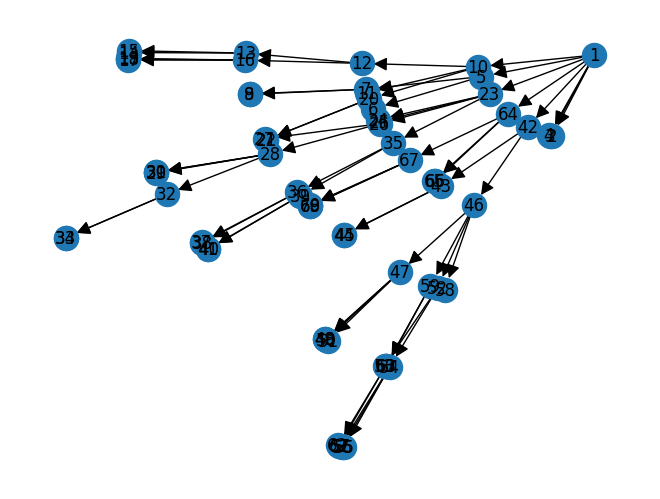

------------------------Leaf Labels------------------------
Feuille 2: [0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1]
Feuille 3: [1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1]
Feuille 4: [1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]
Feuille 6: [0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Feuille 8: [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
Feuille 9: [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0]
Feuille 11: [0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0]
Feuille 14: [0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0]
Feuille 15: [0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0]
Feuille 17: [0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0]
Feuille 18: [0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0]
Feuille 19: [0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1

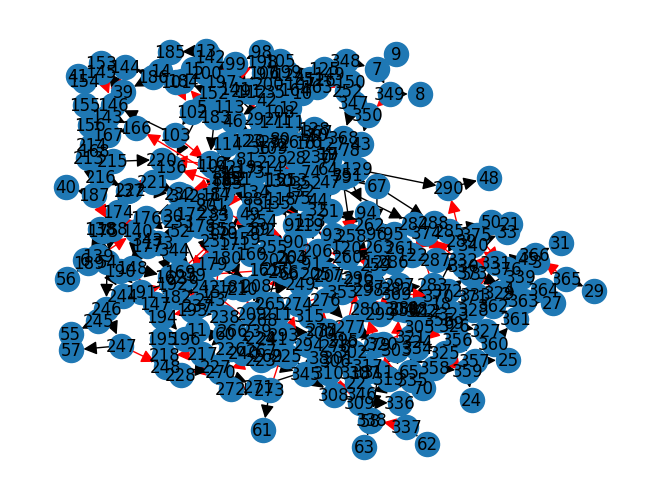

------------------------Timestamp------------------------
Nœud 1 : 0
Nœud 2 : 125
Nœud 3 : 125
Nœud 4 : 125
Nœud 5 : 5
Nœud 6 : 125
Nœud 7 : 30
Nœud 8 : 125
Nœud 9 : 125
Nœud 10 : 10
Nœud 11 : 125
Nœud 12 : 35
Nœud 13 : 70
Nœud 14 : 125
Nœud 15 : 125
Nœud 16 : 75
Nœud 17 : 125
Nœud 18 : 125
Nœud 19 : 125
Nœud 20 : 40
Nœud 21 : 125
Nœud 22 : 125
Nœud 23 : 15
Nœud 24 : 125
Nœud 25 : 125
Nœud 26 : 45
Nœud 27 : 125
Nœud 28 : 80
Nœud 29 : 125
Nœud 30 : 125
Nœud 31 : 125
Nœud 32 : 110
Nœud 33 : 125
Nœud 34 : 125
Nœud 35 : 50
Nœud 36 : 85
Nœud 37 : 125
Nœud 38 : 125
Nœud 39 : 90
Nœud 40 : 125
Nœud 41 : 125
Nœud 42 : 20
Nœud 43 : 55
Nœud 44 : 125
Nœud 45 : 125
Nœud 46 : 60
Nœud 47 : 95
Nœud 48 : 125
Nœud 49 : 125
Nœud 50 : 125
Nœud 51 : 125
Nœud 52 : 100
Nœud 53 : 125
Nœud 54 : 115
Nœud 55 : 125
Nœud 56 : 125
Nœud 57 : 125
Nœud 58 : 125
Nœud 59 : 105
Nœud 60 : 120
Nœud 61 : 125
Nœud 62 : 125
Nœud 63 : 125
Nœud 64 : 25
Nœud 65 : 125
Nœud 66 : 125
Nœud 67 : 65
Nœud 68 : 125
Nœud 69 : 125
Nœud 70

In [ ]:
from treebasednetworks import *


# Définir le nombre de caractères
nbrCaractere= 23

# Initialisation du l'arbre species
tree_builder = TreeBuilder()
species=tree_builder.initialize_graph(species, nbrCaractere)

# Trouver le nœud racine (source) de l'arbre
root_id = [node for node in species.nodes() if species.in_degree(node) == 0]

# Ajouter des timestamps aux nœuds du species
timestamp_manager = TimestampManager()
species=timestamp_manager.add_timestamp(species,root_id[0])

# Affichage l'arbre species
tree_builder.drawGraph(species)

# Etiquettage des feuilles de l'arbre species depuis dic.pkl
labeler = LeafLabeler()
species= labeler.label_tree_leaves_species(species, nbrCaractere, dic)
labeler.display_leaf_labels(species)

#attributes = labeling_internal_nodes(species, attributes)

# Définition des attributs pour chaque nœud
attributes = labeler.set_leaf_attributes(species, nbrCaractere)

# ---------------------- Appeler la fonction TransferAdditionGreedy ----------------------
# Ajouter des transferts aux nœuds de l'arbre en fonction des attributs des nœuds afin de construire un Tree-Based Network PTN.
tree_networks = TreeBasedNetworks()
species, attributes = tree_networks.TransferAdditionGreedy(species, attributes)

# Affichage des attributs mis à jour après l'application des transferts
print(attributes)
# Affichage du notre TBN species avec les nouvelles arêtes
tree_builder.drawGraph(species)

print(species)

# Affichage des timestamps des tous les nœuds du graphe
timestamp_manager.display_timestamps(species)

# Sauvegarde du notre TBN species dans un fichier pickle
file2= open('output_algo2.pkl','wb')
pkl.dump(species,file2)



**Validation de la résultat de l'algorithme 2 en utilisant l'algorithme 1.**


-------------------------------------
{1: {'Characters': [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None], 'spece': None}, 2: {'Characters': [0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1], 'spece': 2}, 3: {'Characters': [1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1], 'spece': 3}, 4: {'Characters': [1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], 'spece': 4}, 5: {'Characters': [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None], 'spece': None}, 6: {'Characters': [0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'spece': 6}, 7: {'Characters': [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None], 'spece': None}, 8: {'Characters': [0, 0, 1, 0,

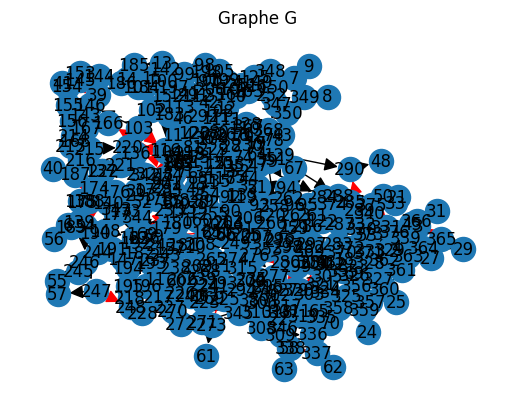

----------------------------------------------------------------------------------------------------------
Nœuds ayant au moins un descendant sans le caractère c23 Fc23: [62, 18, 8, 56, 13, 17, 53, 59, 50, 1, 71, 47, 16, 6, 11, 44, 94, 95, 97, 100, 101, 102, 103, 104, 106, 107, 108, 116, 117, 122, 126, 127, 128, 129, 132, 133, 61, 58, 55, 137, 138, 139, 140, 136, 141, 9, 144, 145, 146, 147, 148, 149, 154, 155, 156, 157, 162, 163, 166, 167, 168, 169, 172, 173, 174, 175, 176, 177, 5, 182, 183, 185, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 52, 199, 200, 201, 198, 49, 214, 215, 216, 217, 218, 220, 221, 222, 223, 228, 230, 231, 232, 233, 236, 237, 238, 239, 242, 243, 244, 245, 246, 247, 248, 249, 251, 252, 253, 43, 46, 12, 22, 266, 267, 57, 7, 270, 271, 272, 273, 284, 285, 286, 287, 290, 291, 296, 297, 300, 301, 306, 307, 308, 309, 310, 311, 15, 313, 42, 60, 63, 10, 54, 51, 332, 333, 334, 335, 336, 337, 338, 342, 343, 344, 345, 346, 348, 349, 350, 351, 14, 45, 48, 20, 19]
Graphe Ĝ

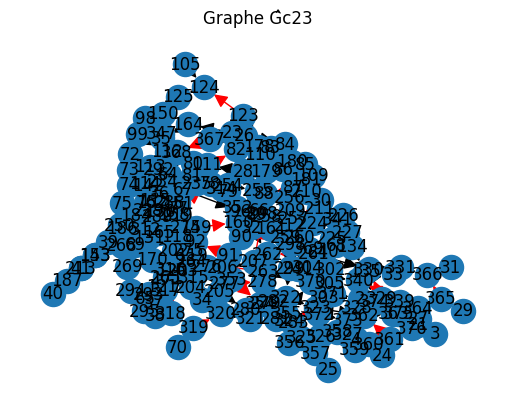

Racines de G^c23: [139742421810256, 139742807083699, 139742807083703]
Feuilles de G^c23: [139742421795024, 139742425388240, 139742421795408, 139742421809808, 139742421810576, 139742421810896, 139742421827984, 139742421828624, 139742421828944, 139742421829264, 139742421829904, 139742421830224, 139742421831376, 139742421831696, 139742421832400, 139742421832720, 139742421841104, 139742421841424, 139742421842064, 139742421842384, 139742421842704]
Rv(G^c23): {139742421830672, 139742421831696, 139742421841424, 139742421832720, 139742421828624, 139742421827664, 139742421830224, 139742421795408, 139742421842064, 139742421809808, 139742807083666, 139742807083667, 139742807083668, 139742807083669, 139742807083670, 139742807083671, 139742807083672, 139742807083673, 139742807083674, 139742807083675, 139742807083676, 139742807083677, 139742807083678, 139742807083679, 139742807083680, 139742807083681, 139742807083682, 139742807083683, 139742807083684, 139742807083685, 139742807083686, 13974280708368

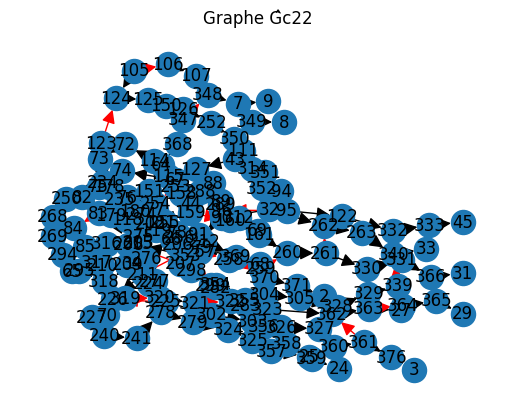

Racines de G^c22: [139742807083676, 139742807083682, 139742807083699, 139742807083705, 139742807083708, 139742807083717]
Feuilles de G^c22: [139742421795024, 139742425388240, 139742421807120, 139742421807312, 139742421810576, 139742421810896, 139742421827984, 139742421828624, 139742421829264, 139742421829904, 139742421830224, 139742421833872, 139742421834192, 139742421841104, 139742421841424, 139742421842064, 139742421842384, 139742421842704]
Rv(G^c22): {139742421829904, 139742421828624, 139742807083804, 139742807083805, 139742807083806, 139742807083820, 139742807083821, 139742807083834, 139742807083835, 139742807083850, 139742807083851, 139742807083852, 139742807083853, 139742807083854, 139742807083855, 139742807083856, 139742807083857, 139742807083872, 139742807083873, 139742807083892, 139742807083893, 139742807083898, 139742807083899, 139742807083916, 139742807083917, 139742807083918, 139742807083919, 139742421829264, 139742421842064, 139742807083920, 139742807083922, 13974280708392

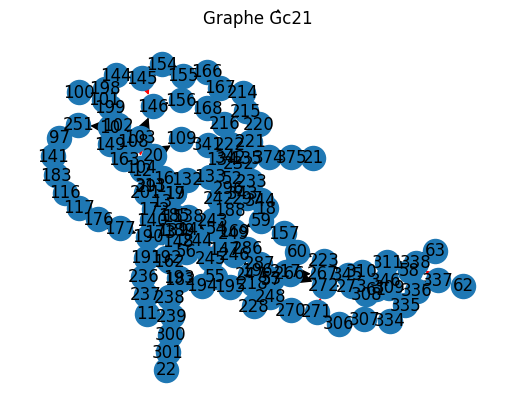

Racines de G^c21: [139742807083694, 139742807083792]
Feuilles de G^c21: [139742421807760, 139742421808336, 139742421808528, 139742421808976, 139742421809168, 139742421809360, 139742421809808, 139742421810000, 139742421836880, 139742421837520, 139742421837840, 139742421838160, 139742421838544, 139742421839568, 139742421839888, 139742421840272]
Rv(G^c21): {139742807083776, 139742807083782, 139742807083783, 139742807083784, 139742807083785, 139742807083786, 139742807083787, 139742807083788, 139742807083789, 139742807083790, 139742421837840, 139742421839888, 139742421836560, 139742807083795, 139742807083808, 139742807083809, 139742807083810, 139742807083811, 139742807083812, 139742807083814, 139742807083815, 139742807083816, 139742807083817, 139742807083822, 139742807083826, 139742807083827, 139742807083830, 139742807083831, 139742807083832, 139742807083833, 139742807083836, 139742807083837, 139742807083838, 139742807083839, 139742807083840, 139742807083841, 139742807083842, 13974280708384

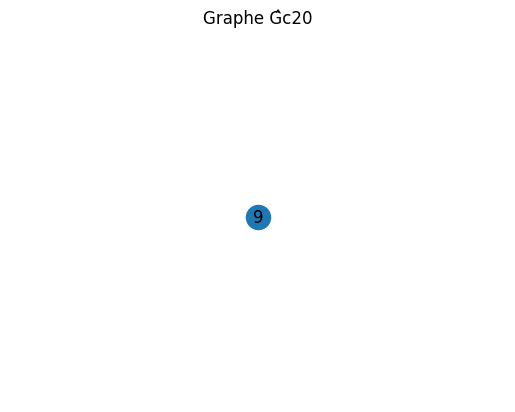

Racines de G^c20: [139742421807312]
Feuilles de G^c20: [139742421807312]
Rv(G^c20): set()
L(G^c)⊆ Rv(G^c), avec Racine v: 139742421807312

{1: {'Characters': [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 0, 0, 0, 0], 'spece': None}, 2: {'Characters': [0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1], 'spece': 2}, 3: {'Characters': [1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1], 'spece': 3}, 4: {'Characters': [1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], 'spece': 4}, 5: {'Characters': [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 0, 0, 0, 0], 'spece': None}, 6: {'Characters': [0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'spece': 6}, 7: {'Characters': [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, N

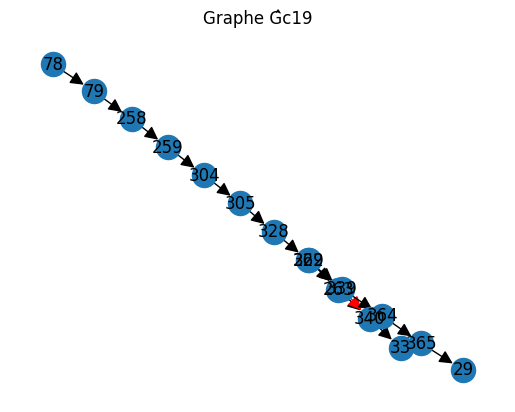

Racines de G^c19: [139742807083672, 139742807083856]
Feuilles de G^c19: [139742421828624, 139742421829904]
Rv(G^c19): {139742807083852, 139742807083853, 139742421829904, 139742421828624, 139742807083922, 139742807083923, 139742807083958, 139742807083959, 139742807083673, 139742807083898, 139742807083899, 139742807083933, 139742807083934}
L(G^c)⊆ Rv(G^c), avec Racine v: 139742807083672

{1: {'Characters': [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 0, 0, 0, 0, 0], 'spece': None}, 2: {'Characters': [0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1], 'spece': 2}, 3: {'Characters': [1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1], 'spece': 3}, 4: {'Characters': [1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], 'spece': 4}, 5: {'Characters': [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 0, 0, 0, 0, 0], 's

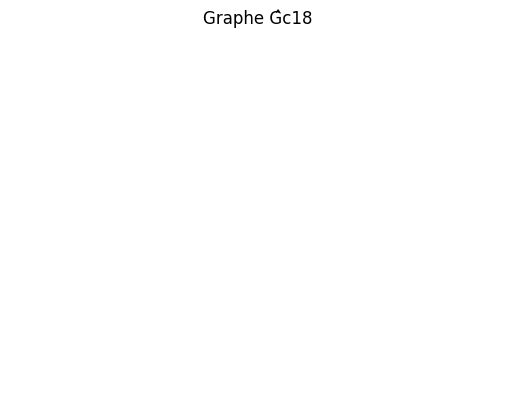


{1: {'Characters': [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 0, 0, 0, 0, 0, 0], 'spece': None}, 2: {'Characters': [0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1], 'spece': 2}, 3: {'Characters': [1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1], 'spece': 3}, 4: {'Characters': [1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], 'spece': 4}, 5: {'Characters': [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 0, 0, 0, 0, 0, 0], 'spece': None}, 6: {'Characters': [0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'spece': 6}, 7: {'Characters': [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 0, 0, 0, 0, 1, 0], 'spece': None}, 8: {'Characters': [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], 'spece': 8}, 9: {'Characters': [0

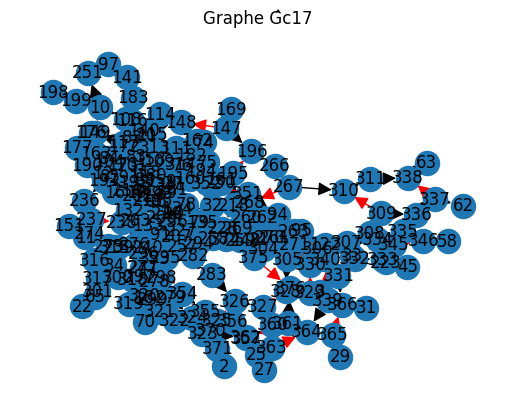

Racines de G^c17: [139742807083668, 139742807083676, 139742807083682, 139742807083698, 139742807083705, 139742807083708, 139742807083745, 139742807083763, 139742807083792, 139742807083817, 139742807083945]
Feuilles de G^c17: [139742421795024, 139742425388240, 139742421807760, 139742421808336, 139742421808528, 139742421808976, 139742421809168, 139742421809360, 139742421809808, 139742421810000, 139742421810896, 139742421827984, 139742421828624, 139742421829264, 139742421829904, 139742421830224, 139742421834192, 139742421838544, 139742421839888, 139742421840272, 139742421841104, 139742421842704]
Rv(G^c17): {139742421809168, 139742421839888, 139742421828624, 139742421842704, 139742421829904, 139742807083800, 139742807083801, 139742807083844, 139742807083852, 139742807083853, 139742807083854, 139742807083855, 139742807083856, 139742807083857, 139742421810000, 139742807083862, 139742807083863, 139742807083864, 139742807083865, 139742807083876, 139742807083877, 139742807083888, 13974280708388

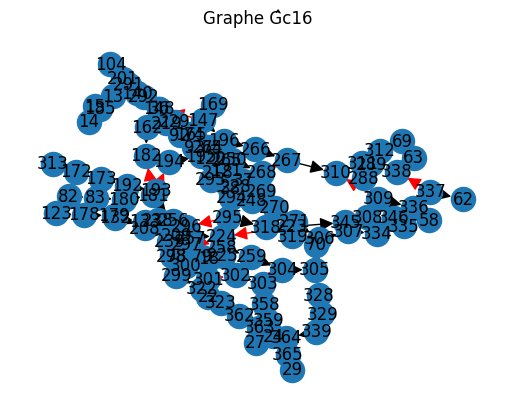

Racines de G^c16: [139742807083668, 139742807083672, 139742807083676, 139742807083698, 139742807083717, 139742807083726, 139742807083763, 139742807083817, 139742807083882, 139742807083885, 139742807083907]
Feuilles de G^c16: [139742421808336, 139742421808528, 139742421809168, 139742421810000, 139742421810576, 139742421827984, 139742421828624, 139742421831376, 139742421831696, 139742421838544, 139742421839888, 139742421840272, 139742421842384, 139742421842704]
Rv(G^c16): {139742807083904, 139742807083905, 139742807083906, 139742807083912, 139742807083913, 139742807083916, 139742807083917, 139742421842704, 139742421809168, 139742421839888, 139742421840272, 139742421827984, 139742807083669, 139742807083922, 139742421810576, 139742807083928, 139742807083929, 139742807083930, 139742807083931, 139742807083932, 139742807083933, 139742807083940, 139742421828624, 139742807083952, 139742807083953, 139742807083956, 139742807083957, 139742807083958, 139742807083959, 139742807083923, 13974280708384

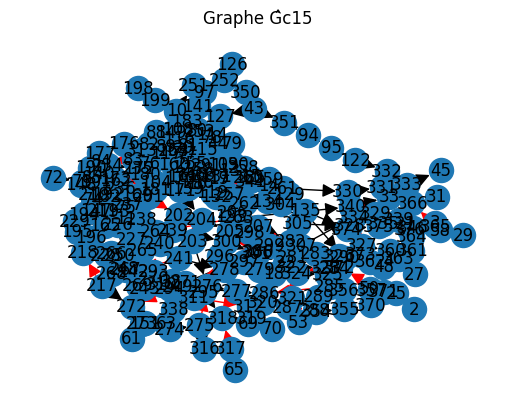

Racines de G^c15: [139742807083666, 139742807083682, 139742807083698, 139742807083708, 139742807083720, 139742807083723, 139742807083745, 139742807083763, 139742807083792, 139742807083811, 139742807083823]
Feuilles de G^c15: [139742421795024, 139742425388240, 139742421795408, 139742421807760, 139742421808336, 139742421808528, 139742421808976, 139742421809168, 139742421809360, 139742421809808, 139742421810000, 139742421810896, 139742421827984, 139742421828624, 139742421829264, 139742421829904, 139742421831696, 139742421833872, 139742421834192, 139742421835216, 139742421835856, 139742421836880, 139742421838544, 139742421839568, 139742421840272, 139742421841104, 139742421841424, 139742421842384, 139742421842704]
Rv(G^c15): {139742421841424, 139742421809168, 139742421828624, 139742421831696, 139742421835856, 139742421836880, 139742421795408, 139742421807760, 139742421829264, 139742421809808, 139742807083667, 139742807083668, 139742807083669, 139742807083670, 139742807083671, 13974280708367

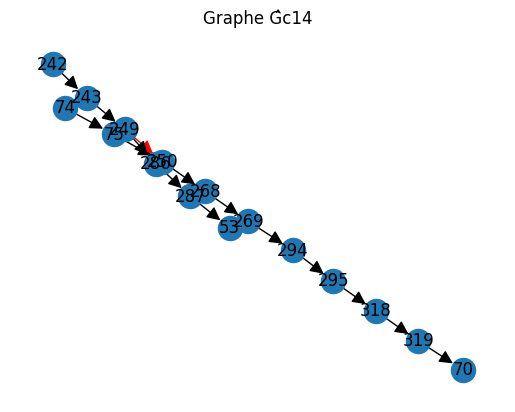

Racines de G^c14: [139742807083668, 139742807083836]
Feuilles de G^c14: [139742421836880, 139742421842704]
Rv(G^c14): {139742807083844, 139742807083912, 139742807083913, 139742807083888, 139742807083889, 139742421842704, 139742807083669, 139742807083862, 139742807083863}
Rv(G^c14): {139742807083843, 139742807083844, 139742807083880, 139742807083881, 139742807083912, 139742807083913, 139742421836880, 139742807083888, 139742807083889, 139742421842704, 139742807083862, 139742807083863, 139742807083837}
L(G^c)⊆ Rv(G^c), avec Racine v: 139742807083836

{1: {'Characters': [None, None, None, None, None, None, None, None, None, None, None, None, None, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'spece': None}, 2: {'Characters': [0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1], 'spece': 2}, 3: {'Characters': [1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1], 'spece': 3}, 4: {'Characters': [1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], 'spece':

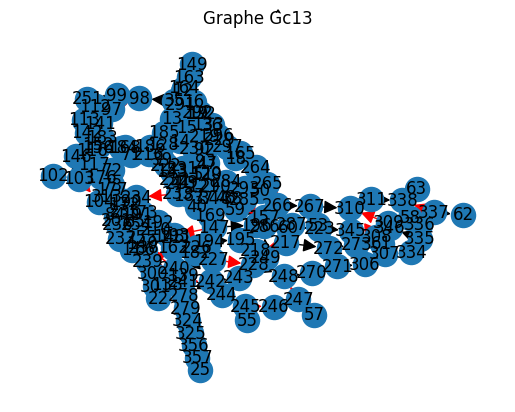

Racines de G^c13: [139742807083665, 139742807083678, 139742807083696, 139742807083732, 139742807083743, 139742807083845, 139742807083907]
Feuilles de G^c13: [139742421807760, 139742421808336, 139742421808528, 139742421808976, 139742421809168, 139742421809360, 139742421810000, 139742421810896, 139742421831376, 139742421831696, 139742421832400, 139742421832720, 139742421835216, 139742421835536, 139742421835856, 139742421836176, 139742421836880, 139742421837520, 139742421838160, 139742421838544, 139742421839568, 139742421839888, 139742421840272, 139742421841424]
Rv(G^c13): {139742807083776, 139742807083788, 139742807083789, 139742807083790, 139742421841424, 139742421839888, 139742421835536, 139742807083811, 139742807083812, 139742807083817, 139742807083822, 139742807083824, 139742807083825, 139742807083826, 139742807083827, 139742807083828, 139742807083829, 139742807083830, 139742807083831, 139742807083832, 139742807083833, 139742807083834, 139742807083835, 139742807083836, 13974280708383

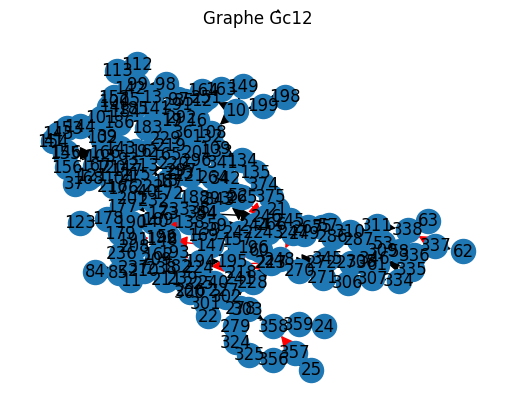

Racines de G^c12: [139742807083678, 139742807083717, 139742807083792]
Feuilles de G^c12: [139742421807760, 139742421808336, 139742421808528, 139742421808976, 139742421809168, 139742421809360, 139742421809808, 139742421810000, 139742421810576, 139742421810896, 139742421831376, 139742421831696, 139742421832400, 139742421832720, 139742421836880, 139742421837520, 139742421837840, 139742421838160, 139742421838544, 139742421839568, 139742421839888, 139742421840272]
Rv(G^c12): {139742807083904, 139742807083905, 139742807083918, 139742807083919, 139742421839888, 139742421810576, 139742421840272, 139742807083928, 139742807083929, 139742807083930, 139742807083931, 139742807083804, 139742807083805, 139742807083932, 139742807083679, 139742807083940, 139742807083820, 139742807083821, 139742807083822, 139742807083950, 139742807083951, 139742807083952, 139742807083953, 139742807083834, 139742807083835, 139742807083836, 139742807083837, 139742807083838, 139742807083839, 139742807083840, 13974280708384

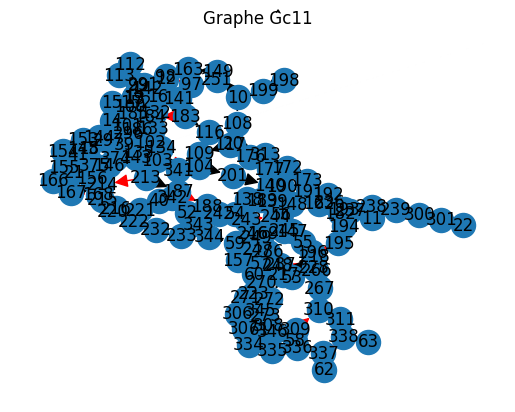

Racines de G^c11: [139742807083792]
Feuilles de G^c11: [139742421807760, 139742421808336, 139742421808528, 139742421808976, 139742421809168, 139742421809360, 139742421809808, 139742421810000, 139742421832400, 139742421832720, 139742421836880, 139742421837520, 139742421837840, 139742421838160, 139742421838544, 139742421839568, 139742421839888, 139742421840272]
Rv(G^c11): {139742421808144, 139742421809168, 139742421832720, 139742421837840, 139742421839888, 139742421838928, 139742421836880, 139742421808784, 139742421809808, 139742421807760, 139742421832400, 139742807083691, 139742807083692, 139742807083693, 139742807083694, 139742807083695, 139742807083696, 139742807083697, 139742807083698, 139742807083702, 139742807083703, 139742807083706, 139742807083707, 139742807083710, 139742807083711, 139742807083726, 139742807083727, 139742807083728, 139742421809360, 139742807083729, 139742421808336, 139742807083732, 139742421837520, 139742807083733, 139742807083735, 139742807083736, 13974280708373

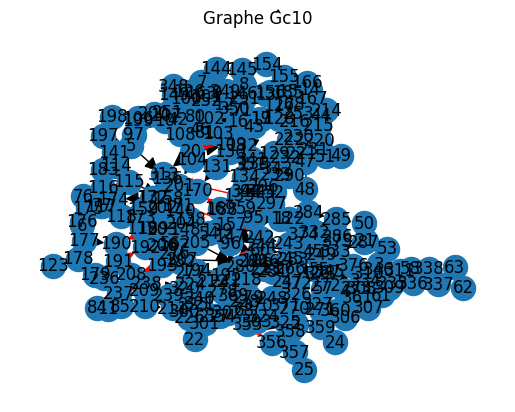

Racines de G^c10: [139742807083670, 139742807083674, 139742807083678, 139742807083708, 139742807083717, 139742807083791]
Feuilles de G^c10: [139742421795024, 139742425388240, 139742421795408, 139742421806736, 139742421807120, 139742421807312, 139742421807760, 139742421808336, 139742421808528, 139742421808976, 139742421809168, 139742421809360, 139742421809808, 139742421810000, 139742421810576, 139742421810896, 139742421833872, 139742421834192, 139742421835216, 139742421835536, 139742421835856, 139742421836176, 139742421836880, 139742421837520, 139742421837840, 139742421838160, 139742421838544, 139742421839568, 139742421839888, 139742421840272, 139742421842064]
Rv(G^c10): {139742421839888, 139742807083800, 139742807083801, 139742807083802, 139742807083803, 139742807083804, 139742807083805, 139742807083806, 139742807083818, 139742807083819, 139742807083820, 139742807083821, 139742807083822, 139742807083834, 139742807083835, 139742807083836, 139742807083837, 139742807083838, 13974280708383

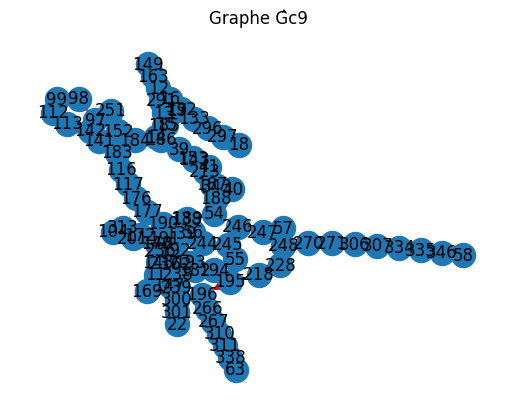

Racines de G^c9: [139742807083698, 139742807083743, 139742807083763, 139742807083845, 139742807083907, 139742807083937]
Feuilles de G^c9: [139742421807760, 139742421808336, 139742421808528, 139742421808976, 139742421809168, 139742421809360, 139742421810000, 139742421832400, 139742421832720, 139742421837520, 139742421837840, 139742421838160, 139742421838544, 139742421840272]
Rv(G^c9): {139742807083776, 139742807083904, 139742807083905, 139742807083842, 139742807083788, 139742807083789, 139742807083790, 139742421840272, 139742421838544, 139742807083795, 139742807083860, 139742807083861, 139742807083734, 139742807083928, 139742807083929, 139742807083864, 139742807083865, 139742807083932, 139742807083742, 139742807083812, 139742807083940, 139742807083756, 139742807083822, 139742807083900, 139742807083901}
Rv(G^c9): {139742807083776, 139742807083779, 139742807083780, 139742807083781, 139742807083782, 139742807083783, 139742807083784, 139742807083785, 139742807083786, 139742807083787, 139742

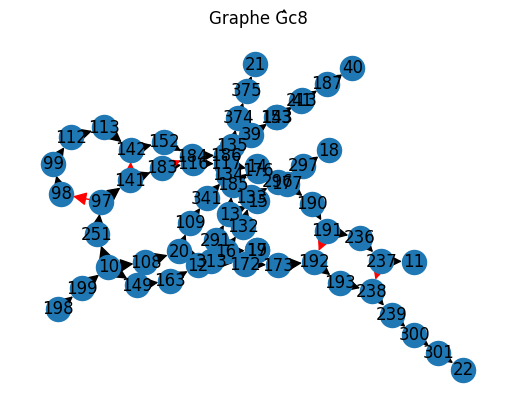

Racines de G^c8: [139742807083792]
Feuilles de G^c8: [139742421807760, 139742421808336, 139742421808528, 139742421808976, 139742421809168, 139742421809360, 139742421809808, 139742421810000, 139742421832400, 139742421832720]
Rv(G^c8): {139742807083777, 139742807083778, 139742807083779, 139742807083780, 139742807083781, 139742807083784, 139742807083785, 139742807083786, 139742807083787, 139742421808144, 139742807083793, 139742421809168, 139742421832720, 139742807083807, 139742807083830, 139742807083831, 139742807083832, 139742807083833, 139742807083845, 139742421807952, 139742421808976, 139742421832016, 139742421810000, 139742807083885, 139742807083890, 139742807083891, 139742807083894, 139742807083895, 139742807083907, 139742421807504, 139742421808784, 139742421808528, 139742421809808, 139742421807760, 139742807083935, 139742807083691, 139742807083692, 139742807083693, 139742807083702, 139742807083703, 139742807083706, 139742807083707, 139742807083710, 139742807083711, 139742807083968, 

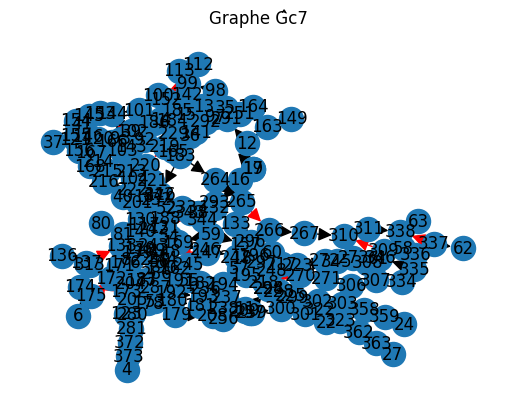

Racines de G^c7: [139742807083674, 139742807083717, 139742807083730, 139742807083743, 139742807083845, 139742807083907]
Feuilles de G^c7: [139742421795408, 139742421806736, 139742421807760, 139742421808336, 139742421808528, 139742421808976, 139742421809168, 139742421809360, 139742421810000, 139742421810576, 139742421827984, 139742421831376, 139742421831696, 139742421832400, 139742421832720, 139742421836880, 139742421837520, 139742421837840, 139742421838160, 139742421838544, 139742421839568, 139742421839888, 139742421840272]
Rv(G^c7): {139742807083776, 139742807083784, 139742807083785, 139742807083786, 139742807083787, 139742807083788, 139742807083789, 139742807083790, 139742421809168, 139742421839888, 139742807083798, 139742807083799, 139742807083802, 139742807083803, 139742807083812, 139742807083818, 139742807083819, 139742807083822, 139742807083830, 139742807083831, 139742807083832, 139742807083833, 139742807083842, 139742807083850, 139742807083851, 139742421795408, 139742421810000, 

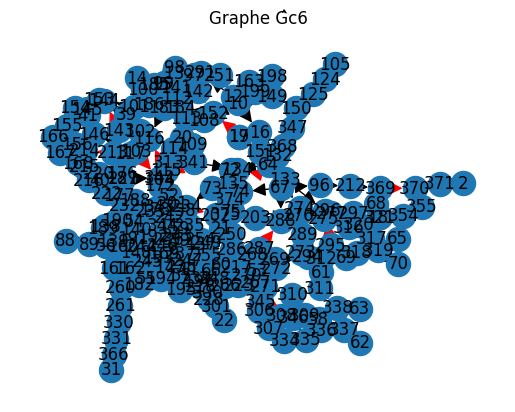

Racines de G^c6: [139742807083682, 139742807083699, 139742807083792]
Feuilles de G^c6: [139742421795024, 139742421807760, 139742421808336, 139742421808528, 139742421808976, 139742421809168, 139742421809360, 139742421809808, 139742421810000, 139742421829264, 139742421832400, 139742421832720, 139742421836880, 139742421837520, 139742421837840, 139742421838160, 139742421838544, 139742421839568, 139742421839888, 139742421840272, 139742421841104, 139742421841424, 139742421842064, 139742421842384, 139742421842704]
Rv(G^c6): {139742807083776, 139742807083788, 139742807083789, 139742807083790, 139742421809168, 139742421842704, 139742421839888, 139742807083812, 139742807083822, 139742807083842, 139742807083854, 139742807083855, 139742807083860, 139742807083861, 139742807083862, 139742807083863, 139742807083864, 139742807083865, 139742807083866, 139742807083867, 139742807083868, 139742807083869, 139742807083870, 139742807083871, 139742807083888, 139742807083889, 139742807083890, 139742807083891, 

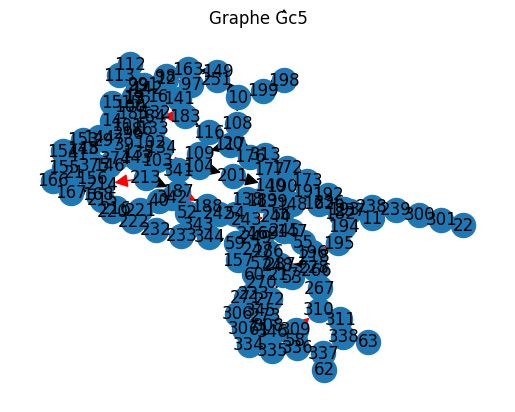

Racines de G^c5: [139742807083792]
Feuilles de G^c5: [139742421807760, 139742421808336, 139742421808528, 139742421808976, 139742421809168, 139742421809360, 139742421809808, 139742421810000, 139742421832400, 139742421832720, 139742421836880, 139742421837520, 139742421837840, 139742421838160, 139742421838544, 139742421839568, 139742421839888, 139742421840272]
Rv(G^c5): {139742421808144, 139742421809168, 139742421832720, 139742421837840, 139742421839888, 139742421838928, 139742421836880, 139742421808784, 139742421809808, 139742421807760, 139742421832400, 139742807083691, 139742807083692, 139742807083693, 139742807083694, 139742807083695, 139742807083696, 139742807083697, 139742807083698, 139742807083702, 139742807083703, 139742807083706, 139742807083707, 139742807083710, 139742807083711, 139742807083726, 139742807083727, 139742807083728, 139742421809360, 139742807083729, 139742421808336, 139742807083732, 139742421837520, 139742807083733, 139742807083735, 139742807083736, 139742807083737, 

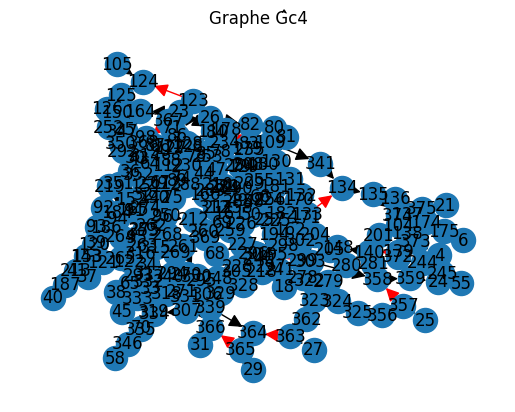

Racines de G^c4: [139742421810256, 139742807083665, 139742807083698, 139742807083699, 139742807083703]
Feuilles de G^c4: [139742421795408, 139742421806736, 139742421809168, 139742421809808, 139742421810576, 139742421810896, 139742421827984, 139742421828624, 139742421828944, 139742421829264, 139742421829904, 139742421830224, 139742421831376, 139742421831696, 139742421832400, 139742421832720, 139742421833872, 139742421834192, 139742421835216, 139742421835536, 139742421835856, 139742421836176, 139742421837520, 139742421838544, 139742421841104, 139742421841424, 139742421842064, 139742421842384, 139742421842704]
Rv(G^c4): {139742421830672, 139742421831696, 139742421841424, 139742421832720, 139742421809168, 139742421828624, 139742421806736, 139742421827664, 139742421835856, 139742421830224, 139742421795408, 139742421842064, 139742421834896, 139742807083666, 139742807083667, 139742807083668, 139742807083669, 139742421833872, 139742421829264, 139742807083672, 139742807083673, 139742807083674, 

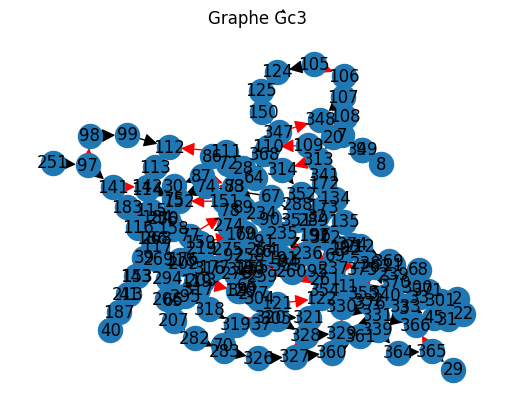

Racines de G^c3: [139742807083699, 139742807083813, 139742807083845, 139742807083945]
Feuilles de G^c3: [139742421795024, 139742425388240, 139742421807120, 139742421807312, 139742421807760, 139742421809808, 139742421810000, 139742421828624, 139742421828944, 139742421829264, 139742421829904, 139742421830224, 139742421831376, 139742421832400, 139742421832720, 139742421834192, 139742421841104, 139742421841424, 139742421842064, 139742421842384, 139742421842704]
Rv(G^c3): {139742421807120, 139742421841424, 139742421832720, 139742421828624, 139742421830224, 139742421807760, 139742421809808, 139742421842064, 139742807083666, 139742807083667, 139742807083668, 139742807083669, 139742807083670, 139742807083671, 139742807083672, 139742807083673, 139742807083680, 139742807083681, 139742807083682, 139742807083683, 139742807083684, 139742807083685, 139742807083686, 139742807083687, 139742807083688, 139742807083689, 139742807083690, 139742421832400, 139742807083700, 139742807083701, 139742807083702, 

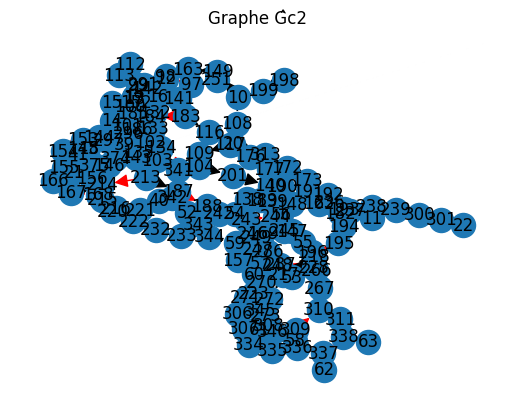

Racines de G^c2: [139742807083792]
Feuilles de G^c2: [139742421807760, 139742421808336, 139742421808528, 139742421808976, 139742421809168, 139742421809360, 139742421809808, 139742421810000, 139742421832400, 139742421832720, 139742421836880, 139742421837520, 139742421837840, 139742421838160, 139742421838544, 139742421839568, 139742421839888, 139742421840272]
Rv(G^c2): {139742421808144, 139742421809168, 139742421832720, 139742421837840, 139742421839888, 139742421838928, 139742421836880, 139742421808784, 139742421809808, 139742421807760, 139742421832400, 139742807083691, 139742807083692, 139742807083693, 139742807083694, 139742807083695, 139742807083696, 139742807083697, 139742807083698, 139742807083702, 139742807083703, 139742807083706, 139742807083707, 139742807083710, 139742807083711, 139742807083726, 139742807083727, 139742807083728, 139742421809360, 139742807083729, 139742421808336, 139742807083732, 139742421837520, 139742807083733, 139742807083735, 139742807083736, 139742807083737, 

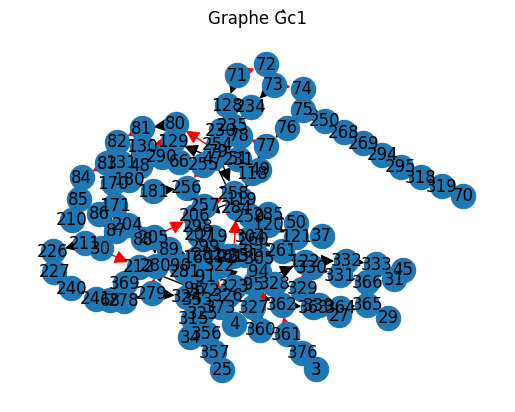

Racines de G^c1: [139742807083665, 139742807083813, 139742807083945]
Feuilles de G^c1: [139742425388240, 139742421795408, 139742421810896, 139742421827984, 139742421828624, 139742421828944, 139742421829264, 139742421830224, 139742421831376, 139742421834192, 139742421835216, 139742421835536, 139742421835856, 139742421836176, 139742421841424, 139742421842064, 139742421842704]
Rv(G^c1): {139742421841424, 139742421828624, 139742421835856, 139742421795408, 139742421830224, 139742421834896, 139742421829264, 139742807083666, 139742807083667, 139742807083668, 139742807083669, 139742807083670, 139742807083671, 139742807083672, 139742807083673, 139742807083674, 139742807083675, 139742807083676, 139742807083677, 139742807083678, 139742807083679, 139742807083680, 139742807083681, 139742807083682, 139742807083683, 139742807083684, 139742807083685, 139742807083686, 139742807083687, 139742807083688, 139742807083689, 139742807083690, 139742807083712, 139742807083713, 139742807083714, 139742807083715, 

In [ ]:
# Définition des attributs pour chaque nœud
attributes = labeler.set_leaf_attributes(species,nbrCaractere)

print("\n-------------------------------------")
print(attributes)
print("\n-------------------------------------")
# Liste des caractères à vérifier
C = [f'c{i+1}' for i in range(nbrCaractere)]

# Appel de la fonction findLabeling (Algo1)
tree_networks = TreeBasedNetworks()
l = tree_networks.findLabeling(species, attributes, C)

# Affichage le dictionnaire des attributs final
print("\n----------------- Attributs final --------------------")
print(attributes)
print("\n-------------------------------------")

# Affichage des timestamps des tous les nœuds du graphe
timestamp_manager.display_timestamps(species)



--------------------------------------------------------------------------------
# **inferred_HGT**



**- À partir du résultat de l'algorithme 2, Gluton "output_algo2," nous allons construire le graphe HGT inféré où chaque nœud représente une espèce et chaque arête représente un événement de transfert.**

=> Nous avons identifié la présence de 412 arêtes et 45 nœuds dans le graphe "inferred_HGT_algo2".

139742807083665
139742807083666
Transfert (71, 72) ajouter caractere N°: 1:
  Feuilles atteignables par le nœud de départ 71 :  {48, 49, 50, 51}
  Feuilles atteignables par le nœud d'arrivée 72 :  {66}
139742807083667
139742807083668
Transfert (73, 74) ajouter caractere N°: 1:
  Feuilles atteignables par le nœud de départ 73 :  {66}
  Feuilles atteignables par le nœud d'arrivée 74 :  {70}
139742807083669
139742807083670
Transfert (75, 76) ajouter caractere N°: 1:
  Feuilles atteignables par le nœud de départ 75 :  {70}
  Feuilles atteignables par le nœud d'arrivée 76 :  {3}
139742807083671
139742807083672
Transfert (77, 78) ajouter caractere N°: 1:
  Feuilles atteignables par le nœud de départ 77 :  {3}
  Feuilles atteignables par le nœud d'arrivée 78 :  {29}
139742807083673
139742807083674
Transfert (79, 80) ajouter caractere N°: 1:
  Feuilles atteignables par le nœud de départ 79 :  {29}
  Feuilles atteignables par le nœud d'arrivée 80 :  {4}
139742807083675
139742807083676
Transfert

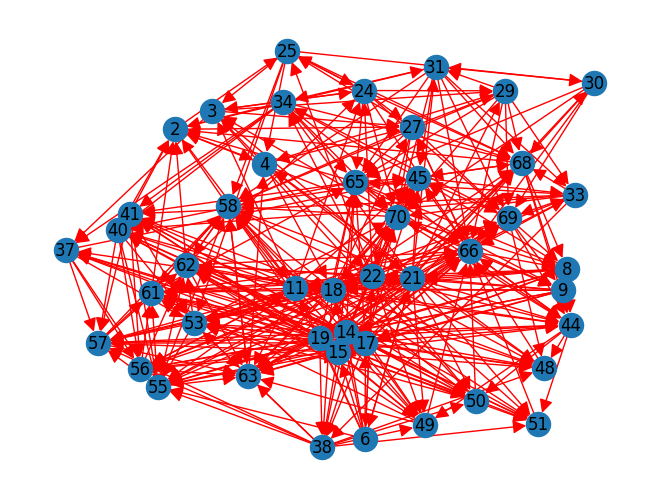

DiGraph with 45 nodes and 397 edges


In [ ]:
transfer_manager = TransferManager()
G, Tr=transfer_manager.extract_reachable_leaves_graph(species)

tree_builder.drawGraph(Tr)
print(Tr)

file3= open('inferred_HGT_algo2.pkl','wb')
pkl.dump(Tr,file3)

In [ ]:
# Afficher les attributs des nœuds de Tr
print("Attributs des nœuds de Tr:")
for node, attributes in Tr.nodes(data=True):
    print(f"Feuille {Tr.nodes[node]['number']} {node}: {attributes}")

# Afficher les attributs des arêtes de Tr
print("Attributs des arêtes de Tr:")
for u, v, attributes in Tr.edges(data=True):
    print(f"Arête ({Tr.nodes[u]['number']}, {Tr.nodes[v]['number']}) : {attributes}")

Attributs des nœuds de Tr:
Feuille 51 139742421836176: {'species': 'T01842', 'number': 51, 'timestamp': 125, 'type': '', 'label': [1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}
Feuille 49 139742421835536: {'species': 'T02505', 'number': 49, 'timestamp': 125, 'type': '', 'label': [1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}
Feuille 48 139742421835216: {'species': 'T03496', 'number': 48, 'timestamp': 125, 'type': '', 'label': [1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]}
Feuille 50 139742421835856: {'species': 'T04222', 'number': 50, 'timestamp': 125, 'type': '', 'label': [1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]}
Feuille 66 139742421841424: {'species': 'T02133', 'number': 66, 'timestamp': 125, 'type': '', 'label': [1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1]}
Feuille 70 139742421842704: {'species': 'T06523', 'number': 70, 'timestamp': 125, 'type': '', 'label': 